# Overlapping analysis with constant attribution score cutoff (top 100)

In [28]:
import pandas as pd


pd.set_option("display.max_columns", None) # show all cols
pd.set_option('display.max_colwidth', None) # show full width of showing cols
pd.set_option("display.expand_frame_repr", False) # print cols side by side as it's supposed to be
pd.set_option('display.max_rows', 500)

In [2]:
import os
import pandas as pd
from pathlib import Path


bedDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'bed_files', 'SAUR')

bedDfList = []
for bedFile in os.listdir(bedDir):
    tubeid = bedFile.split('.')[0].split('_')[0]
    tokensDf = pd.read_csv(Path(bedDir, bedFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score'])
    tokensDf['tube_id'] = tubeid
    bedDfList.append(tokensDf)

bedDf = pd.concat(bedDfList, ignore_index=True)
bedDf


,contig_id,start_position,end_position,tokens,score,tube_id
0,1,0,6,TTTTCTT,0.000064,ALF22G140
1,1,7,9,ACC,-0.000395,ALF22G140
2,1,10,13,GACA,0.001573,ALF22G140
3,1,14,18,AGAAT,-0.000986,ALF22G140
4,1,19,25,TAATTAT,0.000795,ALF22G140
...,...,...,...,...,...,...
176721937,5,181665,181667,CGG,-0.002273,AH21C044
176721938,5,181668,181673,CTCATC,-0.001735,AH21C044
176721939,5,181674,181676,GCA,-0.003468,AH21C044
176721940,5,181677,181680,TCCA,-0.000228,AH21C044


In [3]:
bedDf['token_length'] = bedDf.tokens.apply(lambda x: len(x))
bedDf

,contig_id,start_position,end_position,tokens,score,tube_id,token_length
0,1,0,6,TTTTCTT,0.000064,ALF22G140,7
1,1,7,9,ACC,-0.000395,ALF22G140,3
2,1,10,13,GACA,0.001573,ALF22G140,4
3,1,14,18,AGAAT,-0.000986,ALF22G140,5
4,1,19,25,TAATTAT,0.000795,ALF22G140,7
...,...,...,...,...,...,...,...
176721937,5,181665,181667,CGG,-0.002273,AH21C044,3
176721938,5,181668,181673,CTCATC,-0.001735,AH21C044,6
176721939,5,181674,181676,GCA,-0.003468,AH21C044,3
176721940,5,181677,181680,TCCA,-0.000228,AH21C044,4


In [4]:
highscoreDf = bedDf.sort_values(by=['score'], ascending=False)[:100]
highscoreDf

,contig_id,start_position,end_position,tokens,score,tube_id,token_length
12546445,3,300016,300022,TTATATA,0.401408,AH19K071,7
30627859,4,292501,292505,TCACA,0.392442,AH20J041,5
8636242,4,175077,175082,GAACAT,0.331686,ALF22E035,6
8636234,4,175031,175036,TAAACT,0.329530,ALF22E035,6
20052075,3,307641,307648,TGATTTTT,0.268324,ALF22F089,8
...,...,...,...,...,...,...,...
72019100,3,192912,192918,TAAAACT,0.077782,AH19F010,7
8636233,4,175026,175030,TGTAC,0.076539,ALF22E035,5
87912711,5,182598,182601,GTGA,0.075881,ALF23C182,4
54909373,3,330020,330024,GCGGC,0.075453,AH20C034,5


In [5]:
highscoreDf.shape

(100, 7)

In [6]:
highscoreDf.token_length.value_counts()

token_length
5    33
6    26
4    18
7    16
3     3
8     2
9     2
Name: count, dtype: int64

<Axes: xlabel='token_length', ylabel='Count'>

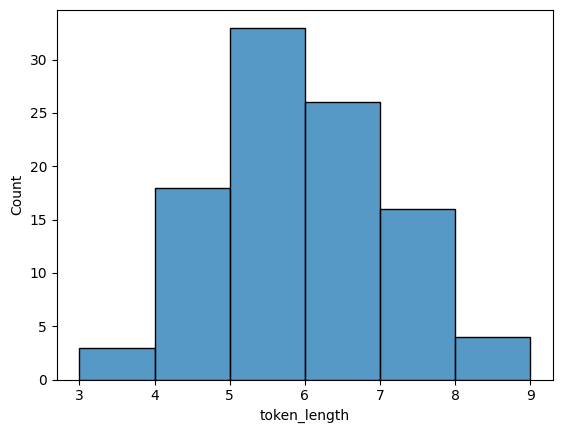

In [7]:
import seaborn as sns

sns.histplot(highscoreDf.token_length, binwidth=1)

## Obtain token overlaps with annotations

In [8]:
import os
import pandas as pd
from pathlib import Path


overlappingFilesDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'overlapping_with_annotations', 'SAUR')
overlappingFilesDir.mkdir(parents=True, exist_ok=True)

overlappingDfList = []
for overlappingFile in os.listdir(overlappingFilesDir):
    df = pd.read_csv(Path(overlappingFilesDir, overlappingFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score', 'feature_type', 'id', 'name', 'gene', 'atributes'])
    df['tube_code'] = [overlappingFile.split('_')[0]]*df.shape[0]
    overlappingDfList.append(df)
overlappingDf = pd.concat(overlappingDfList, ignore_index=True)
overlappingDf

/tmp/ipykernel_87721/2277659407.py:11: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Path(overlappingFilesDir, overlappingFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score', 'feature_type', 'id', 'name', 'gene', 'atributes'])
/tmp/ipykernel_87721/2277659407.py:11: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Path(overlappingFilesDir, overlappingFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score', 'feature_type', 'id', 'name', 'gene', 'atributes'])
/tmp/ipykernel_87721/2277659407.py:11: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Path(overlappingFilesDir, overlappingFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score', 'feature_type', 'id', 'name', 'gene', 'at

,contig_id,start_position,end_position,tokens,score,feature_type,id,name,gene,atributes,tube_code
0,1,127,130,AAAA,-0.004951,CDS,OILJNO_00005,acyl carrier protein,acpP,"ID=OILJNO_00005;Name=acyl carrier protein;locus_tag=OILJNO_00005;product=acyl carrier protein;Dbxref=GO:0000036,GO:0005737,GO:0046677,RefSeq:WP_000426914.1,SO:0001217,UniParc:UPI0000125385,UniRef:UniRef100_A7X1J8,UniRef:UniRef50_A7X1J8,UniRef:UniRef90_A7X1J8;gene=acpP",AH20I016
1,1,131,134,TTTC,-0.000510,CDS,OILJNO_00005,acyl carrier protein,acpP,"ID=OILJNO_00005;Name=acyl carrier protein;locus_tag=OILJNO_00005;product=acyl carrier protein;Dbxref=GO:0000036,GO:0005737,GO:0046677,RefSeq:WP_000426914.1,SO:0001217,UniParc:UPI0000125385,UniRef:UniRef100_A7X1J8,UniRef:UniRef50_A7X1J8,UniRef:UniRef90_A7X1J8;gene=acpP",AH20I016
2,1,135,137,GAT,-0.009607,CDS,OILJNO_00005,acyl carrier protein,acpP,"ID=OILJNO_00005;Name=acyl carrier protein;locus_tag=OILJNO_00005;product=acyl carrier protein;Dbxref=GO:0000036,GO:0005737,GO:0046677,RefSeq:WP_000426914.1,SO:0001217,UniParc:UPI0000125385,UniRef:UniRef100_A7X1J8,UniRef:UniRef50_A7X1J8,UniRef:UniRef90_A7X1J8;gene=acpP",AH20I016
3,1,138,145,AAAGTAAA,0.009005,CDS,OILJNO_00005,acyl carrier protein,acpP,"ID=OILJNO_00005;Name=acyl carrier protein;locus_tag=OILJNO_00005;product=acyl carrier protein;Dbxref=GO:0000036,GO:0005737,GO:0046677,RefSeq:WP_000426914.1,SO:0001217,UniParc:UPI0000125385,UniRef:UniRef100_A7X1J8,UniRef:UniRef50_A7X1J8,UniRef:UniRef90_A7X1J8;gene=acpP",AH20I016
4,1,146,151,AGATAT,-0.010377,CDS,OILJNO_00005,acyl carrier protein,acpP,"ID=OILJNO_00005;Name=acyl carrier protein;locus_tag=OILJNO_00005;product=acyl carrier protein;Dbxref=GO:0000036,GO:0005737,GO:0046677,RefSeq:WP_000426914.1,SO:0001217,UniParc:UPI0000125385,UniRef:UniRef100_A7X1J8,UniRef:UniRef50_A7X1J8,UniRef:UniRef90_A7X1J8;gene=acpP",AH20I016
...,...,...,...,...,...,...,...,...,...,...,...
136910729,5,205776,205781,ATTTTT,-0.002056,CDS,KKIOAG_10525,Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase,pulO,"ID=KKIOAG_10525;Name=Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase;locus_tag=KKIOAG_10525;product=Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase;Dbxref=COG:COG1989,COG:NU,RefSeq:WP_000261111.1,SO:0001217,UniParc:UPI0001DDA595,UniRef:UniRef100_A0A0D1JKS9,UniRef:UniRef50_A0A0D1JKS9,UniRef:UniRef90_A0A0D1JKS9;gene=pulO",AH21K020
136910730,5,205782,205787,AGGAGG,0.000008,CDS,KKIOAG_10525,Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase,pulO,"ID=KKIOAG_10525;Name=Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase;locus_tag=KKIOAG_10525;product=Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase;Dbxref=COG:COG1989,COG:NU,RefSeq:WP_000261111.1,SO:0001217,UniParc:UPI0001DDA595,UniRef:UniRef100_A0A0D1JKS9,UniRef:UniRef50_A0A0D1JKS9,UniRef:UniRef90_A0A0D1JKS9;gene=pulO",AH21K020
136910731,5,205788,205790,CGT,-0.002779,CDS,KKIOAG_10525,Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase,pulO,"ID=KKIOAG_10525;Name=Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase;locus_tag=KKIOAG_10525;product=Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase;Dbxref=COG:COG1989,COG:NU,RefSeq:WP_000261111.1,SO:0001217,UniParc:UPI0001DDA595,UniRef:UniRef100_A0A0D1JKS9,UniRef:UniRef50_A0A0D1JKS9,UniRef:UniRef90_A0A0D1JKS9;gene=pulO",AH21K020
136910732,5,205791,205798,ATATTTTT,-0.000752,CDS,KKIOAG_10525,Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase,pulO,"ID=KKIOAG_10525;Name=Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase;locus_tag=KKIOAG_10525;product=Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase;Dbxref=COG:COG1989,COG:NU,RefSeq:WP_000261111.1,SO:0001217,UniParc:UPI0001DDA595,UniRef:UniRef100_A0A0D1JKS9,UniRef:UniRe

## Obtain annotation overlapping with top tokens

In [9]:
import pandas as pd

from pathlib import Path


for tokenLengthCutoff in range(5, 11):
    print('tokenLengthCutoff: ', str(tokenLengthCutoff))
    tokensDf = highscoreDf[highscoreDf.token_length == tokenLengthCutoff]
    signatureTokens = tokensDf.tokens.unique()
    tokenOverlapsDfs = []
    for signatureToken in signatureTokens:
        tokenOverlapsDf = overlappingDf[overlappingDf.tokens == signatureToken]
        tokenOverlapsDfs.append(tokenOverlapsDf)
    if tokenOverlapsDfs:
        top100OverlapsPath = Path(os.environ['GENOMICS_DATA_BASE'], 'survival_analysis', 'SAUR', 'constant_score_overlaping_annotations')
        top100OverlapsPath.mkdir(parents=True, exist_ok=True)
        finalTokenOverlapsDf = pd.concat(tokenOverlapsDfs, ignore_index=True)
        finalTokenOverlapsDf.drop_duplicates().to_csv(Path(top100OverlapsPath, 'top_100_tl_' + str(tokenLengthCutoff) + '.csv'), index=False)

tokenLengthCutoff:  5
tokenLengthCutoff:  6
tokenLengthCutoff:  7
tokenLengthCutoff:  8
tokenLengthCutoff:  9
tokenLengthCutoff:  10


## Create data for an upset plot

In [10]:
import os

from pathlib import Path

import pandas as pd


overlappingGenesDict = {}
overlappingAnnotationsDict = {}

for tokenLengthCutoff in range(5, 11):
    print('tokenLengthCutoff: ', str(tokenLengthCutoff))
    overlappingGenesPath = Path(os.environ['GENOMICS_DATA_BASE'], 'survival_analysis', 'SAUR', 'constant_score_overlaping_annotations', 'top_100_tl_' + str(tokenLengthCutoff) + '.csv')
    if overlappingGenesPath.exists():
        overlappingGenesDf = pd.read_csv(overlappingGenesPath)
        overlappingGenesDict['Token Length > ' + str(tokenLengthCutoff)] = overlappingGenesDf.gene.unique()
        overlappingAnnotationsDict['Token Length > ' + str(tokenLengthCutoff)] = overlappingGenesDf

tokenLengthCutoff:  5
tokenLengthCutoff:  6
tokenLengthCutoff:  7
tokenLengthCutoff:  8
tokenLengthCutoff:  9
tokenLengthCutoff:  10


## Generate upset plot

/home/vmadmin/workspace/alfred-data-analysis/.venv/lib/python3.10/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/vmadmin/workspace/alfred-data-analysis/.venv/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the 

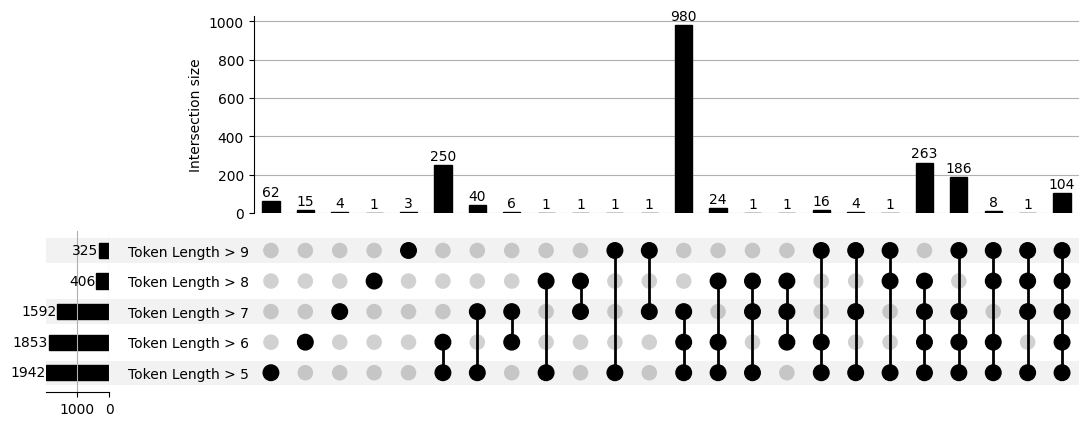

In [11]:
from upsetplot import UpSet

from upsetplot import from_contents


ax_dict = UpSet(from_contents(overlappingGenesDict), show_counts=True, sort_categories_by='input').plot()

## Obtain singature genes

In [22]:
singatureGenes = set()

### Common overlapping genes

In [23]:
singatureGenes.update(set.intersection(*[set([v for v in value if str(v) != 'nan']) for key, value in overlappingGenesDict.items()]))

### Common genes in `Token Length > 5`, `Token Length > 6`, `Token Length > 8`, `Token Length > 9`, `Token Length > 10`

In [ ]:
# singatureGenes.update(set.intersection(*[set([v for v in value if str(v) != 'nan']) for key, value in overlappingGenesDict.items() if (key and (key != 'Token Length > 7'))]))

### Common genes in `Token Length > 5`, `Token Length > 6`, `Token Length > 7`, `Token Length > 9`, `Token Length > 10`

In [ ]:
# singatureGenes.update(set.intersection(*[set([v for v in value if str(v) != 'nan']) for key, value in overlappingGenesDict.items() if (key and (key != 'Token Length > 8'))]))

### Common genes in `Token Length > 5`, `Token Length > 6`, `Token Length > 7`, `Token Length > 8`, `Token Length > 10`

In [ ]:
# singatureGenes.update(set.intersection(*[set([v for v in value if str(v) != 'nan']) for key, value in overlappingGenesDict.items() if (key and (key != 'Token Length > 9'))]))

### Common genes in `Token Length > 5`, `Token Length > 6`, `Token Length > 7`, `Token Length > 8`, `Token Length > 9`

In [ ]:
# singatureGenes.update(set.intersection(*[set([v for v in value if str(v) != 'nan']) for key, value in overlappingGenesDict.items() if (key and (key != 'Token Length > 10'))]))

## Display signature gene names

In [24]:
singatureGenes

{'aceF',
 'addA',
 'addB',
 'aes',
 'ansP',
 'araJ',
 'argF',
 'arsB',
 'aur',
 'azoR',
 'betB',
 'bglG',
 'bshA',
 'capN',
 'ccmA',
 'ccmC',
 'citM',
 'coa',
 'coiA',
 'comEC',
 'dinG',
 'dnaG',
 'dppD',
 'eap',
 'ebh',
 'era',
 'esaA',
 'fadM',
 'fbp',
 'femA',
 'fmhA',
 'fnbA',
 'fnbB',
 'frwC',
 'ftsI',
 'ftsK',
 'glpG',
 'gntR',
 'hdeD',
 'hemA',
 'hlgC',
 'holA',
 'hsdS',
 'hslU',
 'isaA',
 'isdD',
 'lacG',
 'lolC',
 'ltaA',
 'ltrA',
 'lukD',
 'lukS-PV',
 'lysR',
 'mazF',
 'menC',
 'mngR',
 'mnhE2',
 'oafA',
 'opuBB',
 'orf47',
 'pbuX',
 'pitA',
 'pnp',
 'priA',
 'proP',
 'pstS',
 'purF',
 'purL',
 'recJ',
 'rfaB',
 'ribE',
 'rnj1',
 'rpiR',
 'sasF',
 'sau3AIR',
 'sbcC',
 'sdrC',
 'sdrG',
 'sfaD',
 'smc',
 'splB',
 'spn',
 'srmB',
 'tarL',
 'tdcB',
 'tehA',
 'tnp',
 'topA',
 'traG',
 'trkA',
 'ushA',
 'uvrA',
 'uvrC',
 'vraG',
 'vwb',
 'xerD',
 'ydcZ',
 'yedE',
 'yfcH',
 'yfhO',
 'yhgE',
 'yhiN',
 'ymcA'}

## Display signature genes along with their description

In [29]:
overlappingDf[['name', 'gene']][overlappingDf.gene.isin(singatureGenes)].drop_duplicates().sort_values(by=['gene'])

,name,gene
53574,Pyruvate/2-oxoglutarate dehydrogenase complex%2C dihydrolipoamide acyltransferase (E2) component,aceF
186223,helicase-exonuclease AddAB subunit AddA,addA
185595,helicase-exonuclease AddAB subunit AddB,addB
166763,Acetyl esterase/lipase,aes
80971,L-asparagine transporter or related permease,ansP
293162,putative arabinose efflux permease AraJ%2C MFS family,araJ
150278,ornithine carbamoyltransferase,argF
1104506,arsenite efflux transporter membrane subunit ArsB,arsB
149697,zinc metalloproteinase aureolysin,aur
105676,FMN-dependent NADH:quinone oxidoreductase,azoR


## Export tokens to visualise

In [30]:
highscoreOverlappingFilesDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'highscore_overlapping', 'SAUR')
highscoreOverlappingFilesDir.mkdir(parents=True, exist_ok=True)

for tubeCode in overlappingDf.tube_code.unique():
    print('tubeCode: ', tubeCode)
    highscoreOverlappingDf = overlappingDf[(overlappingDf.tube_code == tubeCode)].merge(
        highscoreDf[['tokens']],
        how='inner',
        on=['tokens']
    )[['contig_id', 'start_position', 'end_position', 'tokens']].drop_duplicates()
    highscoreOverlappingFile = Path(highscoreOverlappingFilesDir, tubeCode + '.bed')
    highscoreOverlappingDf.to_csv(highscoreOverlappingFile, sep='\t', index=False, header=None)

tubeCode:  AH20I016
tubeCode:  ALF22H103
tubeCode:  AH19C024
tubeCode:  AH20K011
tubeCode:  AH21G019
tubeCode:  ALF22F117
tubeCode:  ALF22D054
tubeCode:  AH19E051
tubeCode:  ALF22C052
tubeCode:  AH19E065
tubeCode:  AH21C012
tubeCode:  ALF22I003
tubeCode:  AH19L024
tubeCode:  AH19L067
tubeCode:  AH21B039
tubeCode:  AH19G028
tubeCode:  AH20A069
tubeCode:  AH18K050
tubeCode:  ALF22L122
tubeCode:  AH20K007
tubeCode:  AH21K075
tubeCode:  ALF22E103
tubeCode:  AH21G070
tubeCode:  AH20A072
tubeCode:  AH19A010
tubeCode:  AH19H009
tubeCode:  AH20K032
tubeCode:  AH21K071
tubeCode:  AH21A090
tubeCode:  AH21A083
tubeCode:  AH21J061
tubeCode:  AH20I032
tubeCode:  AH22A022
tubeCode:  AH18J073
tubeCode:  AH19B059
tubeCode:  AH21I089
tubeCode:  AH19C070
tubeCode:  AH18K039
tubeCode:  AH20I045
tubeCode:  ALF22G032
tubeCode:  AH20F012
tubeCode:  AH18J022
tubeCode:  AH19A063
tubeCode:  AH20L041
tubeCode:  AH21J006
tubeCode:  AH19A088
tubeCode:  AH18J002
tubeCode:  ALF22L144
tubeCode:  ALF22L118
tubeCode: 